In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import Acquire_Prepare
import math

# Wrangle Data

In [2]:
file_name = "anonymized-curriculum-access.txt"
column_names = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df=Acquire_Prepare.acquire(file_name, column_names)

In [3]:
# there are no missing values need to address
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cohort_id   847330 non-null  int64 
 1   name        847330 non-null  object
 2   slack       847330 non-null  object
 3   start_date  847330 non-null  object
 4   end_date    847330 non-null  object
 5   created_at  847330 non-null  object
 6   updated_at  847330 non-null  object
 7   program_id  847330 non-null  int64 
 8   date        847330 non-null  object
 9   endpoint    847329 non-null  object
 10  user_id     847330 non-null  int64 
 11  source_ip   847330 non-null  object
dtypes: int64(3), object(9)
memory usage: 84.0+ MB


In [4]:
# prepare the dataset, drop null values, and set datetime
df=Acquire_Prepare.prep(df)

In [5]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 847329
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   cohort_id   847329 non-null  int64         
 1   name        847329 non-null  object        
 2   slack       847329 non-null  object        
 3   start_date  847329 non-null  datetime64[ns]
 4   end_date    847329 non-null  datetime64[ns]
 5   created_at  847329 non-null  object        
 6   updated_at  847329 non-null  object        
 7   program_id  847329 non-null  int64         
 8   date        847329 non-null  datetime64[ns]
 9   endpoint    847329 non-null  object        
 10  user_id     847329 non-null  int64         
 11  source_ip   847329 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(6)
memory usage: 84.0+ MB


In [6]:
# handle endpoint and merge them into one dataframe
answers=df.endpoint.str.split('/',expand=True)
answers=answers.drop(columns=[2,3,4,5,6,7])
df=pd.merge(df,answers,on=df.index)
df=df.drop(columns=['key_0'])

# Exploration 

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed? 

#### Q1:Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [7]:
df.head()

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,endpoint,user_id,source_ip,0,1
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14,2016-06-14,1,2018-01-26,/,11,97.105.19.61,,
1,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14,2016-06-14,1,2018-01-26,javascript-i,11,97.105.19.61,javascript-i,None
2,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14,2016-06-14,1,2018-01-26,javascript-i/functions,11,97.105.19.61,javascript-i,functions
3,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14,2016-06-14,1,2018-01-26,appendix/further-reading/javascript/hoisting.html,11,97.105.19.61,appendix,further-reading
4,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14,2016-06-14,1,2018-01-26,appendix,11,97.105.19.61,appendix,None


## Key Takeaway
- So the dataframe contains 847329 rows, we can try to answer question 1 by group them by program id

In [8]:
# copy previous explored code
new_df=df.set_index('program_id')
new_df.index.value_counts()

2    713365
3    103411
1     30548
4         5
Name: program_id, dtype: int64

In [9]:
# In first part of expploration, found that there is 4 programs.

In [10]:
# therefore set index to equal to each different program id and then group them by cohort
# find out all cohorts' max visit to each endpoint
program1=new_df[new_df.index==1]
program1.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
content,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397
javascript-i,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708,2972
html-css,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463,1921
spring,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,1823
mysql,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,1783
...,...,...,...,...,...,...,...,...,...,...,...,...
Module_6_Classification,2,2,2,2,2,2,2,2,2,2,2,0
Intro_to_Regression_Module,2,2,2,2,2,2,2,2,2,2,2,0
Intro_to_Regression,1,1,1,1,1,1,1,1,1,1,1,0


In [11]:
# program2
program2=new_df[new_df.index==2]
program2.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
javascript-i,110118,110118,110118,110118,110118,110118,110118,110118,110118,110118,110118,92661
mysql,77340,77340,77340,77340,77340,77340,77340,77340,77340,77340,77340,67022
html-css,79001,79001,79001,79001,79001,79001,79001,79001,79001,79001,79001,66432
jquery,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,46094
spring,53149,53149,53149,53149,53149,53149,53149,53149,53149,53149,53149,41773
...,...,...,...,...,...,...,...,...,...,...,...,...
5.04.05_Exercises,2,2,2,2,2,2,2,2,2,2,2,0
5.04.04_LeastAngleRegression,1,1,1,1,1,1,1,1,1,1,1,0
5.04.03_RidgeRegression,2,2,2,2,2,2,2,2,2,2,2,0


In [12]:
# program 3
program3=new_df[new_df.index==3]
program3.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
fundamentals,8746,8746,8746,8746,8746,8746,8746,8746,8746,8746,8746,8743
classification,8620,8620,8620,8620,8620,8620,8620,8620,8620,8620,8620,8618
,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358
1-fundamentals,7945,7945,7945,7945,7945,7945,7945,7945,7945,7945,7945,7935
sql,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7504
...,...,...,...,...,...,...,...,...,...,...,...,...
curie-stats-assessment,2,2,2,2,2,2,2,2,2,2,2,0
curie-statistics-assessment,1,1,1,1,1,1,1,1,1,1,1,0
curie-python-assessment,7,7,7,7,7,7,7,7,7,7,7,0


In [13]:
# program4
program4=new_df[new_df.index==4]
program4.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
content,4,4,4,4,4,4,4,4,4,4,4,4
,1,1,1,1,1,1,1,1,1,1,1,1


### Q1 answers
- For program 1 across all cohorts that 'javascript-i' lesson has the most traffic
- For program 2 across all cohorts that 'javascript-i' lesson has the most traffic
- For program 3 across all cohorts that 'fundamentals' lesson has the most traffic
- For program 4 across all cohorts that 'content' lesson has the most traffic

### Q2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [14]:
# Check the program 1
program1=program1[program1.endpoint!='/']
answer1=program1.groupby([0],as_index=False).value_counts()

In [15]:
# check which cohort has significant activities
answer1.groupby(['name',0]).sum().sort_values(by='count',ascending=False).head(20)

cohort_id  user_id  count
name    0                                       
Kings   content            23192   135262   2254
Olympic content            16796   272114   1359
Lassen  content            12348   118208   1128
Arches  javascript-i         478    59111   1039
Lassen  spring              6594    25113    882
Olympic javascript-i        7208   127420    825
Arches  html-css             401    39600    816
Lassen  javascript-i        5320    20616    773
        mysql               4914    18603    739
Arches  spring               371    30481    722
        mysql                270    28526    680
Lassen  java-iii            4774    18073    659
Quincy  content             9310    66931    650
Lassen  html-css            3920    15522    597
Arches  java-iii             244    20776    543
        jquery               246    26305    517
        javascript-ii        236    26750    468
Lassen  java-ii             2968    11522    448
        jquery              3220    12761    379
Arches  java-ii              163    14463    333

In [16]:
# check program 2
program2=program2[program2.endpoint!='/']
answer2=program2.groupby([0],as_index=False).value_counts()
# check which cohort has significant activities
answer2.groupby(['name',0]).sum().sort_values(by='count',ascending=False).head(20)

cohort_id  user_id  count
name       0                                      
Ceres      javascript-i     122133  1652647   5991
           html-css          97548  1321253   5163
Zion       javascript-i      90248  1047462   4963
Marco      javascript-i     407295  2641444   4942
Staff      mysql             62636   744480   4780
Betelgeuse javascript-i      89280  1180274   4745
Staff      javascript-i      73164   949492   4484
Jupiter    javascript-i     168206  2066671   4438
Fortuna    javascript-i     142676  1442845   4382
Hyperion   javascript-i     139374  1599524   4237
Staff      spring            64176   708199   4163
Deimos     javascript-i     133263  1304707   4142
           html-css         116535  1142287   4136
Voyageurs  javascript-i      60168   490706   4117
Ganymede   javascript-i     150879  1678694   4092
Wrangell   javascript-i      64325   592261   4074
Zion       mysql             61857   712755   4056
Staff      html-css          60816   733097   4038
Voyageurs  mysql             54264   443480   4011
Fortuna    mysql            110028  1114075   3862

In [17]:
# check program 3
program3=program3[program3.endpoint!='/']
answer3=program3.groupby([0],as_index=False).value_counts()
# check which cohort has significant activities
answer3.groupby(['name',0]).sum().sort_values(by='count',ascending=False).head(20)

,,cohort_id,user_id,count
name,0,,,
Darden,classification,156586,1778148,5029
Florence,fundamentals,172483,1140343,3448
Bayes,1-fundamentals,60894,849318,3124
Darden,sql,105197,1221273,2771
Easley,classification,211869,1282664,2715
Bayes,6-regression,53720,742455,2573
Darden,python,92571,1083321,2572
Curie,3-sql,83985,891059,2499
Easley,fundamentals,157206,952371,2469


In [18]:
# check program 4
program4=program4[program4.endpoint!='/']
answer4=program4.groupby([0],as_index=False).value_counts()
# check which cohort has significant activities
answer4.groupby(['name',0]).sum().sort_values(by='count',ascending=False).head(20)

,,cohort_id,user_id,count
name,0,,,
Apollo,content,27,456,4


### Q2 answer:
- The program 1, kings Cohort has significantly visited content than any other cohorts
- The program 2, Ceres visited cotent significantly more than other cohorts
- The program 3, Darden cohort visited Classification significantly more than other cohorts
- The program 4 has only one cohort

### Q3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

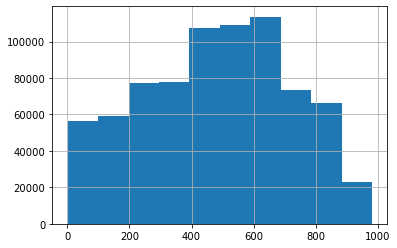

In [19]:
# check how many times each user open up webpage
# looks like users after 820 has significant less activities
question3=df.drop(df[df.name.str.contains("Staff")].index)
question3.user_id.hist()
plt.show()

In [20]:
# set up envovironment for student who were in the cohort before graduate
st=question3[question3.date>question3.start_date]
question3=st[st.date<st.end_date]

In [21]:
# check student id
ind=question3.groupby('user_id').count().sort_values(by=0)
# find the first 20 less active  and create a list to loc them
it=list(ind.index)[:20]

In [22]:
# relocate people who are active, which means they created their account
question3=question3[question3.user_id.isin(it)]
question3.groupby('name').count().sort_values(by=0,ascending=False)

,cohort_id,slack,start_date,end_date,created_at,updated_at,program_id,date,endpoint,user_id,source_ip,0,1
name,,,,,,,,,,,,,
Oberon,112,112,112,112,112,112,112,112,112,112,112,112,99
Sequoia,79,79,79,79,79,79,79,79,79,79,79,79,58
Europa,25,25,25,25,25,25,25,25,25,25,25,25,15
Jupiter,23,23,23,23,23,23,23,23,23,23,23,23,17
Bayes,17,17,17,17,17,17,17,17,17,17,17,17,17
Marco,17,17,17,17,17,17,17,17,17,17,17,17,16
Fortuna,12,12,12,12,12,12,12,12,12,12,12,12,2
Andromeda,8,8,8,8,8,8,8,8,8,8,8,8,7
Hyperion,7,7,7,7,7,7,7,7,7,7,7,7,6


<AxesSubplot:ylabel='name'>

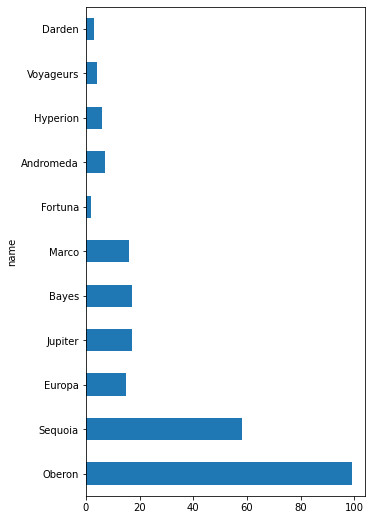

In [23]:
x=question3.groupby('name').count().sort_values(by=0,ascending=False)
x=x[1].plot.barh(figsize=(5, 9))
x

### Q3 key takeaway
- Majority of them are from Oberon and Sequoia cohorts

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [24]:
# find the most active ip address, becasue that could mean something about webscraping
# ip address 97.105.19.58 appears to have over 268648, which is 4 times more than 97.105.19.61
# lets examing if this is one user or multiple users
ip=df.source_ip.value_counts()[df.source_ip.value_counts()>1]
ip=pd.DataFrame(ip)
ip=list(ip.index)

- Your router assigns IP addresses to devices on the network, and each address has to be unique. If two devices had the same IP address, other devices on the network wouldn't be able to distinguish between them. 
from [Microsoft.com](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjcrqCuuM76AhX9F1kFHb7gBHkQFnoECAkQAw&url=https%3A%2F%2Fanswers.microsoft.com%2Fen-us%2Fwindows%2Fforum%2Fall%2Fsomeone-else-on-my-network-with-the-same-ip%2F4857866c-1bf0-4dde-b1f4-4745b64b29d7&usg=AOvVaw19vzVpkuZnK_qTkqK832JB)


In [25]:
# check source ip and create a list that any ip address has used more than once by one user
exam1=df[df.source_ip.isin(ip)]
exam2=exam1.groupby('user_id',as_index=False).value_counts()
exam2=exam2[exam2['count']>1]

In [26]:
# create a Series for user_id
len(exam2.groupby('user_id').count()),len(exam2.groupby('source_ip').count())

(871, 2728)

In [27]:
# check if webscraping happened
exam2[exam2.endpoint.str.contains('.json')]

,user_id,cohort_id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,endpoint,source_ip,0,1,count
36604,675,58,Hyperion,#hyperion,2020-05-26,2020-11-10,2020-05-26,2020-05-26,2,2020-10-30,.well-known/assetlinks.json,70.240.251.44,.well-known,assetlinks.json,2
46135,475,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20,2019-08-20,3,2020-01-08,13-advanced-topics/3.8-json-responses,97.105.19.58,13-advanced-topics,3.8-json-responses,4
46204,585,55,Curie,#curie,2020-02-03,2020-07-07,2020-02-03,2020-02-03,3,2020-06-16,13-advanced-topics/3.8-json-responses,24.26.249.215,13-advanced-topics,3.8-json-responses,2
46214,11,28,Staff,#,2014-02-04,2014-02-04,2018-12-06,2018-12-06,2,2020-01-07,13-advanced-topics/3.8-json-responses,97.105.19.58,13-advanced-topics,3.8-json-responses,2
46228,477,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20,2019-08-20,3,2020-01-08,13-advanced-topics/3.8-json-responses,97.105.19.58,13-advanced-topics,3.8-json-responses,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397980,502,51,Deimos,#deimos,2019-09-16,2020-02-27,2019-09-16,2019-09-16,2,2020-05-08,spring/extra-features/json-response,99.76.234.122,spring,extra-features,2
398038,99,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08,2018-01-08,2,2018-05-02,spring/extra-features/json-response,97.105.19.61,spring,extra-features,2
398062,570,53,Fortuna,#fortuna,2020-01-13,2020-06-23,2020-01-13,2020-01-13,2,2020-05-20,spring/extra-features/json-response,172.124.67.93,spring,extra-features,2
398075,743,61,Bash,#bash,2020-07-20,2021-01-21,2020-07-20,2020-09-30,2,2020-12-18,spring/extra-features/json-response,76.183.231.195,spring,extra-features,2


### Q4 key Takeaway
- There are 871 suspicious users who are using more than one IP address
- There are 2728 suspicious IP address that has been used by more than one users
- Yes, there is potential webscraping due to some endpoints ended with .hemp, .css, or .json

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [28]:
# remove all staff
p1=program1.drop(program1[program1.name.str.contains("Staff")].index)

In [29]:
p3=program3.drop(program3[program3.name.str.contains("Staff")].index)

In [30]:
# set the environment up
q5=p1[p1[0].isin(list(p3[0]))]

In [31]:
# filter out the date
q5=q5[q5['date'].dt.year == 2019]

<AxesSubplot:>

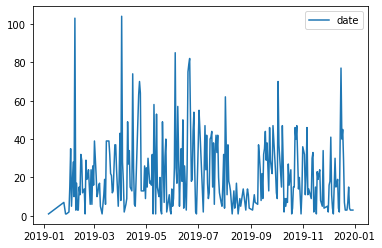

In [32]:
# sort the value so we can review which day's activity has drop significantly
# September probaly has the interest to further examine
final=pd.DataFrame(q5.date.value_counts()).sort_index()
sns.lineplot(data=final)

In [33]:
# it turns out that users are able to access the data science materials
examfinal=q5[q5['date'].dt.month == 9]
examfinal.groupby('endpoint',as_index=False).value_counts()

,endpoint,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,user_id,source_ip,0,1,count
0,1-fundamentals/1.1-intro-to-data-science,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-18,53,97.105.19.58,1-fundamentals,1.1-intro-to-data-science,1
1,1-fundamentals/AI-ML-DL-timeline.jpg,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-18,53,97.105.19.58,1-fundamentals,AI-ML-DL-timeline.jpg,1
2,1-fundamentals/modern-data-scientist.jpg,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-18,53,97.105.19.58,1-fundamentals,modern-data-scientist.jpg,1
3,1-fundamentals/2.4-more-excel-features,19,Quincy,#quincy,2017-06-05,2017-09-22,2017-06-05,2017-06-05,2019-09-12,94,108.78.170.79,1-fundamentals,2.4-more-excel-features,1
4,10-anomaly-detection/1-overview,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-18,53,97.105.19.58,10-anomaly-detection,1-overview,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,spring/extra-features/form-validation,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-27,53,67.10.174.56,spring,extra-features,1
247,spring/extra-features/file-upload,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-27,53,67.10.174.56,spring,extra-features,1
248,spring/extra-features/error-pages,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-27,53,67.10.174.56,spring,extra-features,1
249,spring/extra-features,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18,2016-07-18,2019-09-27,53,67.10.174.56,spring,extra-features,1


In [34]:
# use the other method
examfinal2=q5[q5['date'].dt.month == 11]
examfinal2=examfinal2.groupby('endpoint',as_index=False).value_counts()

In [35]:
# the month of Jan to March are suspicious loss connection
examfinal2[0].value_counts()

spring           56
javascript-ii    24
jquery           20
java-i           18
java-ii          17
html-css         14
appendix          8
javascript-i      8
search            3
examples          1
java-iii          1
mysql             1
Name: 0, dtype: int64

In [36]:
q5=p1[p1[0].isin(list(p3[0]))]
q5_2=q5[q5['date'].dt.year == 2018]

<AxesSubplot:>

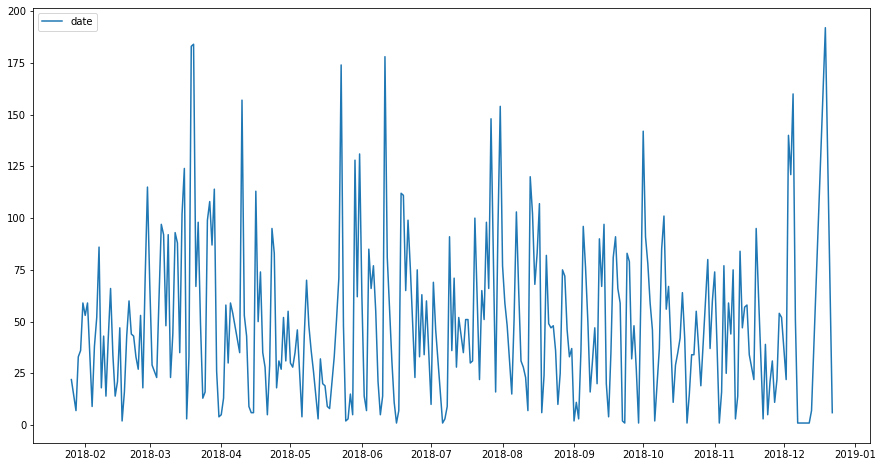

In [37]:
final2=pd.DataFrame(q5_2.date.value_counts()).sort_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=final2)

In [38]:
# use the other method to check other years
examfinal3=q5_2[q5_2['date'].dt.month <=12]
examfinal3=examfinal3.groupby('endpoint',as_index=False).value_counts()

In [39]:
examfinal3[0].value_counts()

javascript-i     859
spring           724
html-css         634
mysql            607
java-iii         592
jquery           445
java-ii          419
appendix         416
javascript-ii    354
java-i           336
examples         113
mkdocs            76
search            53
git               10
Name: 0, dtype: int64

### Q5 Key takeaway
- It is believed that web-dev and data science were not able to access account before August 2019
- and it was shut down in November 2019

## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

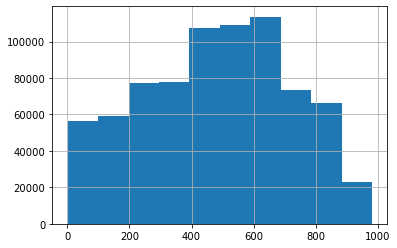

In [40]:
# drop staff and set the date after graduate
question6=df.drop(df[df.name.str.contains("Staff")].index)
question6.user_id.hist()
q6=question6[question6.date>question6.end_date]

In [41]:
# set program id
q6=q6.set_index('program_id')

In [42]:
# program 1
prog1=new_df[new_df.index==1]
prog1.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
content,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397,6397
javascript-i,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708,2972
html-css,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463,2463,1921
spring,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,1823
mysql,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,1783
...,...,...,...,...,...,...,...,...,...,...,...,...
Module_6_Classification,2,2,2,2,2,2,2,2,2,2,2,0
Intro_to_Regression_Module,2,2,2,2,2,2,2,2,2,2,2,0
Intro_to_Regression,1,1,1,1,1,1,1,1,1,1,1,0


In [43]:
# program 2
prog2=new_df[new_df.index==2]
prog2.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
javascript-i,110118,110118,110118,110118,110118,110118,110118,110118,110118,110118,110118,92661
mysql,77340,77340,77340,77340,77340,77340,77340,77340,77340,77340,77340,67022
html-css,79001,79001,79001,79001,79001,79001,79001,79001,79001,79001,79001,66432
jquery,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,46094
spring,53149,53149,53149,53149,53149,53149,53149,53149,53149,53149,53149,41773
...,...,...,...,...,...,...,...,...,...,...,...,...
5.04.05_Exercises,2,2,2,2,2,2,2,2,2,2,2,0
5.04.04_LeastAngleRegression,1,1,1,1,1,1,1,1,1,1,1,0
5.04.03_RidgeRegression,2,2,2,2,2,2,2,2,2,2,2,0


In [44]:
# program 3
prog3=new_df[new_df.index==3]
prog3.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
fundamentals,8746,8746,8746,8746,8746,8746,8746,8746,8746,8746,8746,8743
classification,8620,8620,8620,8620,8620,8620,8620,8620,8620,8620,8620,8618
,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358,8358
1-fundamentals,7945,7945,7945,7945,7945,7945,7945,7945,7945,7945,7945,7935
sql,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7504
...,...,...,...,...,...,...,...,...,...,...,...,...
curie-stats-assessment,2,2,2,2,2,2,2,2,2,2,2,0
curie-statistics-assessment,1,1,1,1,1,1,1,1,1,1,1,0
curie-python-assessment,7,7,7,7,7,7,7,7,7,7,7,0


In [45]:
# program4
prog4=new_df[new_df.index==4]
prog4.groupby(0).count().sort_values(1,ascending=False)

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,
content,4,4,4,4,4,4,4,4,4,4,4,4
,1,1,1,1,1,1,1,1,1,1,1,1


### Q6 key takeaway
- program 1 is content, program 2 is javascript, program 3 is fundamental, and program 4 is content

### 7. Which lessons are least accessed? 

In [46]:
at=df.groupby(0).count().sort_values(1,ascending=True)
at

,cohort_id,name,slack,start_date,end_date,created_at,updated_at,program_id,date,endpoint,user_id,source_ip,1
0,,,,,,,,,,,,,
Clustering_Explore,1,1,1,1,1,1,1,1,1,1,1,1,0
cheatsheet.tex,1,1,1,1,1,1,1,1,1,1,1,1,0
classical_programming_vs_machine_learning.jpeg,2,2,2,2,2,2,2,2,2,2,2,2,0
cli-00-overview,2,2,2,2,2,2,2,2,2,2,2,2,0
cli-01-intro,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,45854,45854,45854,45854,45854,45854,45854,45854,45854,45854,45854,45854,45854
jquery,58317,58317,58317,58317,58317,58317,58317,58317,58317,58317,58317,58317,47276
html-css,81490,81490,81490,81490,81490,81490,81490,81490,81490,81490,81490,81490,68363


In [47]:
at.cohort_id.head(5)

0
Clustering_Explore                                1
cheatsheet.tex                                    1
classical_programming_vs_machine_learning.jpeg    2
cli-00-overview                                   2
cli-01-intro                                      2
Name: cohort_id, dtype: int64

### Q7 key takeaway
- Clustering explore is least accessed topics

# Overall Conclusion and Key takeaway
### Q1 answer
    - For program 1 across all cohorts that 'javascript-i' lesson has the most traffic
    - For program 2 across all cohorts that 'javascript-i' lesson has the most traffic
    - For program 3 across all cohorts that 'fundamentals' lesson has the most traffic
    - For program 4 across all cohorts that 'content' lesson has the most traffic
### Q2 answer:
    - The program 1, kings Cohort has significantly visited content than any other cohorts
    - The program 2, Ceres visited cotent significantly more than other cohorts
    - The program 3, Darden cohort visited Classification significantly more than other cohorts
    - The program 4 has only one cohort
### Q3 answer
    - Majority of them are from Oberon and Sequoia cohorts
### Q4 answer
    - There are 871 suspicious users who are using more than one IP address
    - There are 2728 suspicious IP address that has been used by more than one users
    - Yes, there is potential webscraping due to some endpoints ended with .hemp, .css, or .json
### Q5 answer
    - It is believed that web-dev and data science were not able to access account before August 2019
    - and it was shut down in November 2019
### Q6 answer
    - program 1 is content, program 2 is javascript, program 3 is fundamental, and program 4 is content
### Q7 answer
    - Clustering explore is least accessed topics